In [1]:
import matplotlib.pyplot as plt
from imp import reload
from typing import List
import os
import pickle
import pandas as pd
import numpy as np
import sys
from skimage.transform import resize

sys.path.insert(1, os.path.join(sys.path[0], '..'))
from data_utils import DataHandler
import evaluate
import histogram_processing
import detect_textbox
import similarities
import bg_masks
import image_utils
import image_features
import text_retrieval

N_PROCESS = 10

/tmp/ipykernel_11075/2267604324.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


# Load Data

In [2]:
data_handler = DataHandler()

# Load images:
db, db_files = data_handler.load_images(folder = "../data/BBDD/", extension = ".jpg", desc = "Loading BBDD Data...")
qst1_w3, qst1_w3_files = data_handler.load_images(folder = "../data/Test/qst1_w3/", extension = ".jpg", desc = "Loading qst1_w3 Data...")
qst2_w3, qst2_w3_files = data_handler.load_images(folder = "../data/Test/qst2_w3/", extension = ".jpg", desc = "Loading qst2_w3 Data...")

# Load text:
db_text = data_handler.load_text(folder = "../data/BBDD/", extension = ".txt", desc = "Loading BBDD Text data...")
# qst1_w3_text = data_handler.load_text(folder = "../data/Test/qst1_w3/", extension = ".txt", desc = "Loading qst1_w3_text Data...")
# qst2_w3_text = data_handler.load_text(folder = "../data/Test/qst2_w3/", extension = ".txt", desc = "Loading qst2_w3_text Data...")

Initialized DataHandler with 2 processes


Loading BBDD Data...: 100%|██████████| 287/287 [00:27<00:00, 10.59it/s]


../data/BBDD/ read: 287 images


Loading qst1_w3 Data...: 100%|██████████| 50/50 [00:00<00:00, 72.27it/s]


../data/Test/qst1_w3/ read: 50 images


Loading qst2_w3 Data...: 100%|██████████| 30/30 [00:01<00:00, 17.90it/s]


../data/Test/qst2_w3/ read: 30 images


Loading BBDD Text data...: 100%|██████████| 287/287 [00:00<00:00, 1771.77it/s]


../data/BBDD/ read: 287 images


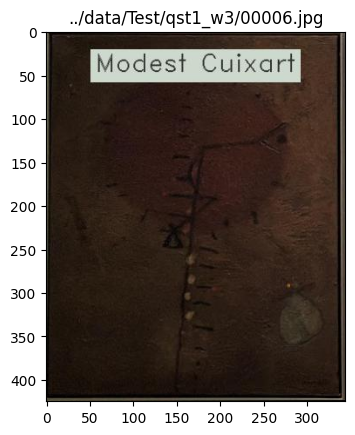

In [3]:
for i, (img, filename) in enumerate(zip(qst1_w3, qst1_w3_files)):
    plt.imshow(img)
    plt.title(filename)
    if i > 5:
        break

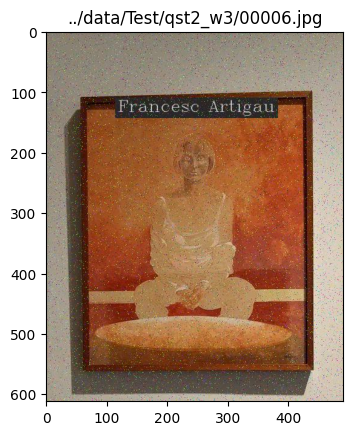

In [4]:
for i, (img, filename) in enumerate(zip(qst2_w3, qst2_w3_files)):
    plt.imshow(img)
    plt.title(filename)
    if i > 5:
        break

In [5]:
from skimage.io import imread

def plot_image_and_similar(qs, top_k_qs) -> None:

    for i in range(min(5, len(qs))):
        f, axarr = plt.subplots(1, 2, figsize=(10, 10))
        query = qs[i]
        res = imread(top_k_qs[i][0])
        axarr[0].imshow(query)
        axarr[0].title.set_text("Query")
        axarr[1].imshow(res)
        axarr[1].title.set_text("Result")
        plt.show()

def plot_image_and_similars(db, qs, top_k_qs) -> None:

    for i in range(min(5, len(qs))):
        f, axarr = plt.subplots(1, 4, figsize=(10, 10))
        axarr[0].imshow(qs[i])
        res_0 = top_k_qs[i][0]
        res_1 = top_k_qs[i][1]
        res_2 = top_k_qs[i][2]
        axarr[1].imshow(db[int(res_0[-9:-4])])
        axarr[2].imshow(db[int(res_1[-9:-4])])
        axarr[3].imshow(db[int(res_2[-9:-4])])
        plt.show()
        
def plot_image_and_similar_painter(db, db_text, qs, qs_text, top_k_qs) -> None:

    for i in range(min(4, len(qs))):
        f, axarr = plt.subplots(1, 4, figsize=(10, 10))
        axarr[0].imshow(qs[i])
        axarr[0].title.set_text(qs_text[i][0])
        res_0 = top_k_qs[i][0]
        res_1 = top_k_qs[i][1]
        res_2 = top_k_qs[i][2]
        axarr[1].imshow(db[res_0])
        axarr[1].title.set_text(db_text[res_0][0])
        axarr[2].imshow(db[res_1])
        axarr[2].title.set_text(db_text[res_1][0])
        axarr[3].imshow(db[res_2])
        axarr[3].title.set_text(db_text[res_2][0])
        plt.show()
        
def plot_image_and_similar_painting(db, db_text, qs, qs_text, top_k_qs) -> None:

    for i in range(min(4, len(qs))):
        f, axarr = plt.subplots(1, 4, figsize=(10, 10))
        axarr[0].imshow(qs[i])
        axarr[0].title.set_text(qs_text[i][1])
        res_0 = top_k_qs[i][0]
        res_1 = top_k_qs[i][1]
        res_2 = top_k_qs[i][2]
        axarr[1].imshow(db[res_0])
        axarr[1].title.set_text(db_text[res_0][1])
        axarr[2].imshow(db[res_1])
        axarr[2].title.set_text(db_text[res_1][1])
        axarr[3].imshow(db[res_2])
        axarr[3].title.set_text(db_text[res_2][1])
        plt.show()


# Task 4

## Filter noise

In [6]:
#Load denoised images:
# TODO: EJECUTAR PIPELINE DENOISING
qst1_w3, qst1_w3_files = data_handler.load_images(folder = "../data/Test/qst1_w3_denoised/", extension = ".jpg", desc = "Loading qst1_w3_denoised Data...")

Loading qst1_w3_denoised Data...: 100%|██████████| 50/50 [00:00<00:00, 61.27it/s]


../data/Test/qst1_w3_denoised/ read: 50 images


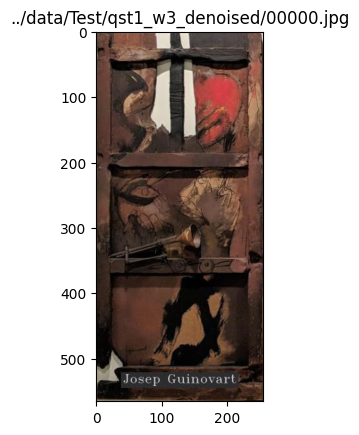

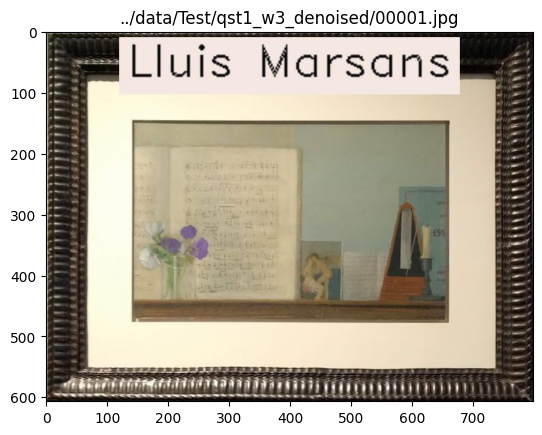

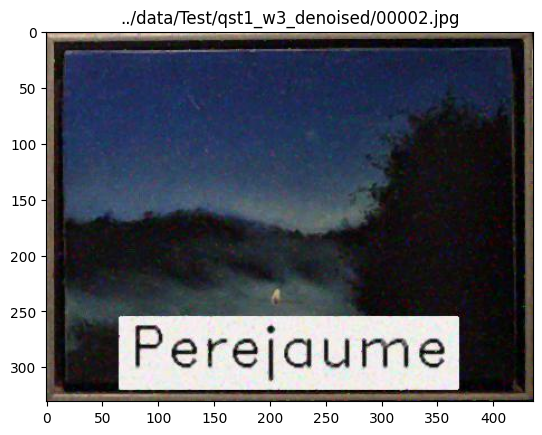

In [7]:
#Show denoised images:
for i, (img, filename) in enumerate(zip(qst1_w3, qst1_w3_files)):
    plt.imshow(img)
    plt.title(filename)
    plt.show()
    if i > 1:
        break

### Masks for text removal

In [10]:
# Week 2 method for text removal:
from skimage.io import imsave
# Find text bounding box.
print("files: ", qst1_w3_files)

bboxes_qst1_w3 = []
for i, (img, filename) in enumerate(zip(qst1_w3, qst1_w3_files)):
    # Find text bounding box.
    bbox_pred = detect_textbox.find_text_bounding_box(qst1_w3[i], kernel_shape = (10, 30))
    
    # Snap negative bbox detected points to origin of image (0), if needed.
    bbox_pred = [0 if c < 0 else c for c in bbox_pred]
    bboxes_qst1_w3.append(bbox_pred)

    # Save predicted masks in folder.
    bbox_mask = detect_textbox.create_textbox_mask(img.shape[0:2], bbox_pred)
    mask_filename = filename[-9:]
    imsave(
        os.path.join('../results/data/Test/w3/bbox_mask_qst1_w3/', mask_filename),
        (255*bbox_mask).astype(np.uint8),
        check_contrast=False)

print("bboxes_qst1_w3 = ", bboxes_qst1_w3)
data_handler.save_object_pickle(bboxes_qst1_w3, "./qst1/text_boxes.pkl")

# Load bbox_masks:
masks_text_qst1_w3, masks_text_qst1_w3_files = data_handler.load_images(
    folder=f"../results/data/Test/w3/bbox_mask_qst1_w3/",
    extension=".jpg",
    desc=f"Loading background text masks for QST1-W3...")

files:  ('../data/Test/qst1_w3_denoised/00000.jpg', '../data/Test/qst1_w3_denoised/00001.jpg', '../data/Test/qst1_w3_denoised/00002.jpg', '../data/Test/qst1_w3_denoised/00003.jpg', '../data/Test/qst1_w3_denoised/00004.jpg', '../data/Test/qst1_w3_denoised/00005.jpg', '../data/Test/qst1_w3_denoised/00006.jpg', '../data/Test/qst1_w3_denoised/00007.jpg', '../data/Test/qst1_w3_denoised/00008.jpg', '../data/Test/qst1_w3_denoised/00009.jpg', '../data/Test/qst1_w3_denoised/00010.jpg', '../data/Test/qst1_w3_denoised/00011.jpg', '../data/Test/qst1_w3_denoised/00012.jpg', '../data/Test/qst1_w3_denoised/00013.jpg', '../data/Test/qst1_w3_denoised/00014.jpg', '../data/Test/qst1_w3_denoised/00015.jpg', '../data/Test/qst1_w3_denoised/00016.jpg', '../data/Test/qst1_w3_denoised/00017.jpg', '../data/Test/qst1_w3_denoised/00018.jpg', '../data/Test/qst1_w3_denoised/00019.jpg', '../data/Test/qst1_w3_denoised/00020.jpg', '../data/Test/qst1_w3_denoised/00021.jpg', '../data/Test/qst1_w3_denoised/00022.jpg', '.

Loading background text masks for QST1-W3...: 100%|██████████| 50/50 [00:00<00:00, 164.53it/s]


../results/data/Test/w3/bbox_mask_qst1_w3/ read: 50 images


### Method 1: Descriptors using only texture

In [9]:
# Selected texture descriptor for qst1_w3:
print ('Selected texture descriptor: HoG')

db_texture_matrix = image_features.hog_batch(images = db[:], mssg="Histograms of Gradients (HoG) from BBDD...")
qst1_w3_texture_matrix = image_features.hog_batch(images = qst1_w3[:], mssg="Histograms of Gradients (HoG) from qst1_w3...")

print (f'We have {qst1_w3_texture_matrix.shape[0]} images, each with a {qst1_w3_texture_matrix.shape[1]} dimensional descriptor')

Selected texture descriptor: HoG


Histograms of Gradients (HoG) from qst1_w3...: 100%|██████████| 50/50 [00:01<00:00, 25.90it/s]


We have 50 images, each with a 300 dimensional descriptor


In [10]:
similarity_matrix_qst1_w3_texture = similarities.compute_similarities_parallel(
    qst1_w3_texture_matrix,
    db_texture_matrix,
    similarities.measures["hellinger_kernel"],
    "Computing similarities for HoG...",
    N_PROCESS,
    masks=[resize(image=mask, output_shape=(300,300)) for mask in masks_text_qst1_w3]
)

Computing similarities for HoG...: 100%|██████████| 50/50 [00:02<00:00, 22.29it/s]


### Method 2: Descriptors using only text

In [11]:
reload(text_retrieval)
pred_texts_greys_qst1_w3_folder = './results/Test/text/pred_texts_greys_qst1_w3/'
text_retrieval.generate_text_files(qst1_w3, qst1_w3_files, pred_texts_greys_qst1_w3_folder, greys=True)
pred_texts_greys_qst1_w3 = data_handler.load_text(folder = pred_texts_greys_qst1_w3_folder, extension = ".txt", desc = "Loading Predicted Text data...", tuples=False)

50it [00:04, 11.25it/s]
Loading Predicted Text data...: 100%|██████████| 50/50 [00:01<00:00, 39.30it/s]

./results/Test/text/pred_texts_greys_qst1_w3/ read: 50 images


In [12]:
similarity_matrix_qst1_w3_text = text_retrieval.get_distances_text_multiple(pred_texts_greys_qst1_w3, db_text)

Retrieving distances from Text: 100%|██████████| 50/50 [00:00<00:00, 280.41it/s]


### Method 3: Descriptors using only color

In [13]:
# 3D Histograms Spatial pyramid representation. Parameters: Best results - Week2
similarity_matrix_qst1_w3_color = similarities.compute_similarities_batch(
    qst1_w3[:], db[:], 'hellinger_kernel',
    n_levels=5, n_bins=6, grayscale=False, RGB=True, CieLab=False, HSV=False, YCbCr=False, histogram3d=True,
    mssg="Computing similarities for denoised qst1-w3...(with N_PROCESS = {})".format(N_PROCESS),
    N_PROCESS=N_PROCESS,
    masks_queries=None,
    masks_database=None,
)

Generating features for query dataset...(with N_PROCESS = 10): 100%|██████████| 50/50 [00:03<00:00, 13.30it/s]


query_features.shape (50, 82512)


Generating features for BBDD dataset...(with N_PROCESS = 10):   7%|▋         | 20/287 [00:00<00:05, 48.13it/s]/Users/johnny/miniconda3/envs/Team1/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Generating features for BBDD dataset...(with N_PROCESS = 10): 100%|██████████| 287/287 [00:22<00:00, 12.50it/s]


db_feature_matrix.shape (287, 82512)


Computing similarities for denoised qst1-w3...(with N_PROCESS = 10): 100%|██████████| 50/50 [00:00<00:00, 139.39it/s]


## Combine descriptors

In [14]:
# Normalize distances:
texture_max = np.asarray(similarity_matrix_qst1_w3_texture).max()
texture_min = np.asarray(similarity_matrix_qst1_w3_texture).min()
norm_similarity_qst1_w3_texture = (similarity_matrix_qst1_w3_texture - texture_min) / (texture_max - texture_min)

color_max = np.asarray(similarity_matrix_qst1_w3_color).max()
color_min = np.asarray(similarity_matrix_qst1_w3_color).min()
norm_similarity_qst1_w3_color = (similarity_matrix_qst1_w3_color - color_min) / (color_max - color_min)

text_max = np.asarray(similarity_matrix_qst1_w3_text).max()
text_min = np.asarray(similarity_matrix_qst1_w3_text).min()
norm_similarity_qst1_w3_text = (similarity_matrix_qst1_w3_text - text_min) / (text_max - text_min)

### Method 5: Descriptors using the best combination of three descriptors

In [15]:
# Combining three descriptors: Color - Texture - Text
color_weight = 1
texture_weight = 4
text_weight = 1

print('Color, text and texture descriptors')
sim_mat_qst1_w3_3descrip = color_weight * norm_similarity_qst1_w3_color + texture_weight * norm_similarity_qst1_w3_texture + text_weight * norm_similarity_qst1_w3_text

Color, text and texture descriptors


Retrieving top 10 similar images for qst1_w3...: 100%|██████████| 50/50 [00:00<00:00, 30450.88it/s]

Results saved at ./qst1/qst1_w3/result.pkl


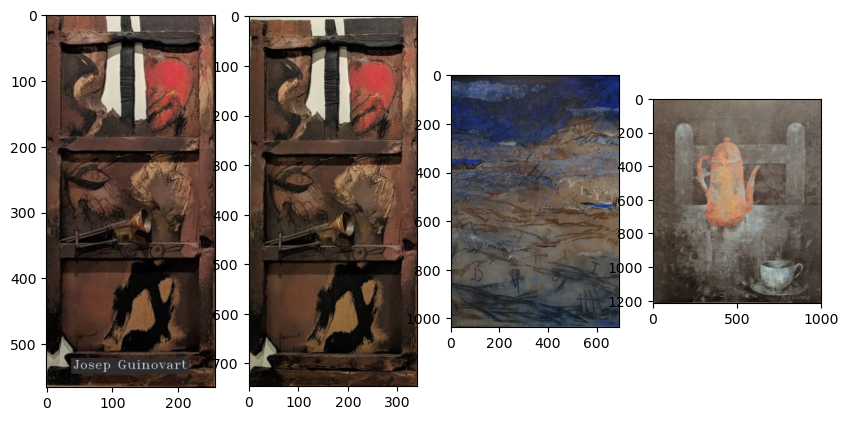

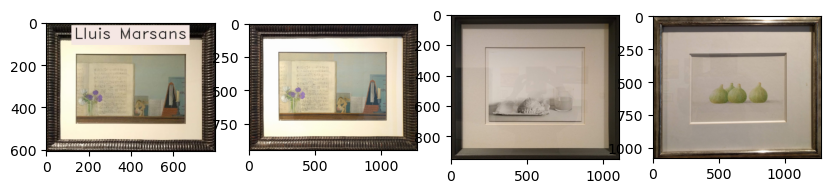

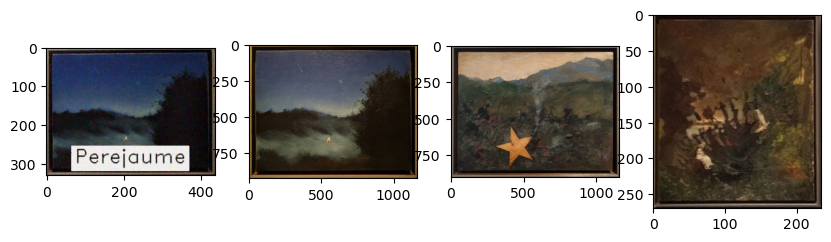

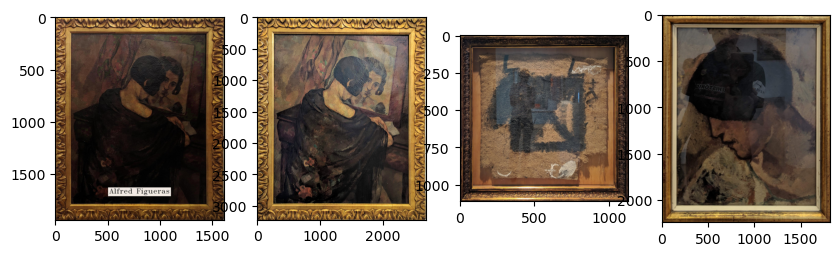

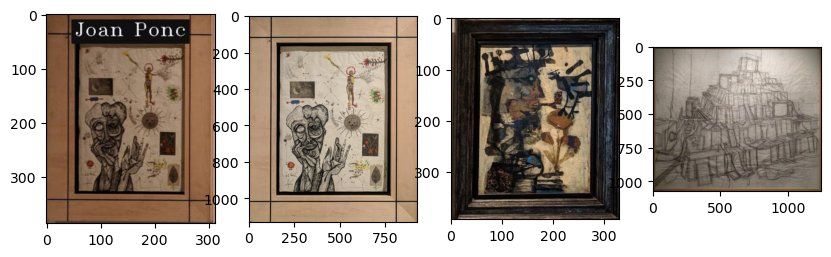

In [16]:
top_10_qst1_w3 = evaluate.get_top_k(similarity_matrix=sim_mat_qst1_w3_3descrip, db_files=db_files,
                                    k=10, mssg="Retrieving top 10 similar images for qst1_w3...")

predicted_results_10 = data_handler.store_outputs_single(top_10_qst1_w3, "./qst1/qst1_w3", save=True)
# predicted_test1 = data_handler.store_outputs_multiple(top_10_qst1_w3, "./qst1/qst1_w3/", save=True)

plot_image_and_similars(db, qst1_w3, top_10_qst1_w3)

## Task 5

In [17]:
#Load denoised images:
# TODO: EJECUTAR PIPELINE DENOISING
qst2_w3, qst2_w3_files = data_handler.load_images(folder = "../data/Test/qst2_w3_denoised/", extension = ".jpg", desc = "Loading qst2_w3_denoised Data...")

Loading qst2_w3_denoised Data...: 100%|██████████| 30/30 [00:01<00:00, 19.44it/s]


../data/Test/qst2_w3_denoised/ read: 30 images


In [18]:
# This code generates masks for the qst2-W3 dataset.
reload(bg_masks)
bg_masks.generate_masks_floodFill(
    qst2_w3[:],
    two_components=True,
    N_PROCESS=N_PROCESS,
    mssg="Generating masks with floodfill method and up to two components...",
    image_files=qst2_w3_files[:],
    output_dir='../data/Test/floodFill_masks_qst2_w3/',
)

Generating masks with floodfill method and up to two components...: 100%|██████████| 30/30 [00:10<00:00,  2.97it/s]


[array([[  0.,   0.,   0., ..., 255., 255., 255.],
        [  0.,   0.,   0., ..., 255., 255., 255.],
        [  0.,   0.,   0., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]]),
 array([[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]]),
 array([[  0.,   0., 255., ..., 255., 255., 255.],
        [  0.,   0., 255., ..., 255., 255., 255.],
        [  0.,   0., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]]),
 array([[  0.,   0.,   0., ..., 255.,

In [19]:
# load background masks
masks_gen_floodFill_qst2_w3, masks_gen_floodFill_qst2_w3_files = data_handler.load_images(
    folder=f"../data/Test/floodFill_masks_qst2_w3/",
    extension=".png",
    desc=f"Loading background masks for qst2-W3..."
)

Loading background masks for qst2-W3...: 100%|██████████| 30/30 [00:01<00:00, 22.08it/s]

../data/Test/floodFill_masks_qst2_w3/ read: 30 images


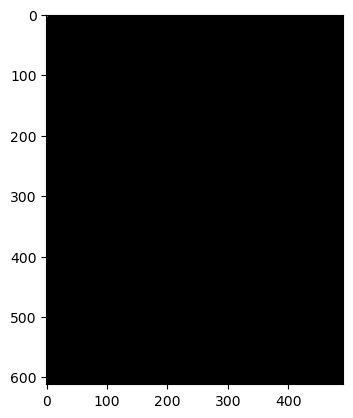

In [20]:
plt.imshow(masks_gen_floodFill_qst2_w3[6], cmap='binary')

In [21]:
reload(image_utils)
bboxes_qst2_w3, paintings_cropped=image_utils.crop_paintings_batch(
    qst2_w3, qst2_w3_files,
    masks_gen_floodFill_qst2_w3,
    output_dir="../results/Test/cropped_paintings_qst2_w3/",
    extract_text_mask=True
)
data_handler.save_object_pickle(bboxes_qst2_w3, "./qst2/text_boxes.pkl")

Done cropping paintings.
Object saved at ./qst2/text_boxes.pkl


In [22]:
reload(text_retrieval)
pred_texts_qst2_w3_folder = './results/Test/text/pred_texts_greys_qst2_w3/'
text_retrieval.generate_text_files_multiple("../results/Test/cropped_paintings_qst2_w3/", pred_texts_qst2_w3_folder, greys=True, binary=False)

### Method 1: Descriptors using only texture

In [23]:
db_texture_matrix = image_features.hog_batch(images = db[:], mssg="Histograms of Gradients (HoG) from BBDD...")
feats_multiple_qst2_w3_texture = image_features.hog_multiple(files_dir="../results/Test/cropped_paintings_qst2_w3/", features_filename="qst2_w3_hog")

Histograms of Gradients (HoG) from BBDD...:  14%|█▍        | 40/287 [00:02<00:09, 26.68it/s]/Users/johnny/miniconda3/envs/Team1/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Histograms of Gradients (HoG) from BBDD...: 100%|██████████| 287/287 [00:24<00:00, 11.62it/s]


In [24]:
similarities_multiple_texture = similarities.compute_similarities_multiple(
    features_multiple=feats_multiple_qst2_w3_texture,
    db_features=db_texture_matrix,
    similarity_measure="hellinger_kernel",
    n_bins=None,
)

### Method 2: Descriptors using only text

In [25]:
reload(text_retrieval)
similarity_multiple_qst2_w3_text = text_retrieval.get_distances_text_2paintings(
    files_dir="../results/Test/cropped_paintings_qst2_w3/",
    text_database=db_text,
    dist = 'damerau_levenshtein'
)

### Method 3: Descriptors using only color

In [26]:
feats_multiple_qst2_w3_color = histogram_processing.compute_features_multiple(
    "../results/Test/cropped_paintings_qst2_w3",
    n_levels=5, n_bins=5,
    grayscale = False, RGB = True, CieLab = False, HSV = False, YCbCr = False,
    histogram3d = True,
    use_mask = False,
)

In [27]:
reload(histogram_processing)
db_feature_matrix_color = histogram_processing.generate_feature_matrix(
    dataset=db[:],
    n_levels=5, n_bins=5,
    grayscale=False,
    RGB=True,
    CieLab=False,
    HSV=False,
    YCbCr=False,
    histogram3d=True,
    mssg="Generating features for BBDD dataset...(with N_PROCESS = {})".format(
        N_PROCESS),
    masks=None,
    N_PROCESS=N_PROCESS,
)

Generating features for BBDD dataset...(with N_PROCESS = 10):  14%|█▍        | 40/287 [00:03<00:17, 14.44it/s]/Users/johnny/miniconda3/envs/Team1/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Generating features for BBDD dataset...(with N_PROCESS = 10): 100%|██████████| 287/287 [00:22<00:00, 12.81it/s]


In [28]:
similarities_multiple_color = similarities.compute_similarities_multiple(
    features_multiple=feats_multiple_qst2_w3_color,
    db_features=db_feature_matrix_color,
    similarity_measure="hellinger_kernel",
    n_bins=5
)

## Combine descriptors

In [29]:
def get_max_multiple(list_of_lists_of_arrays):
    max_val = -99999
    for i in range(len(list_of_lists_of_arrays)):
        for j in range(len(list_of_lists_of_arrays[i])):
            max_val = np.amax([max_val, list_of_lists_of_arrays[i][j].max()])
    return max_val

def get_min_multiple(list_of_lists_of_arrays):
    min_val = 99999
    for i in range(len(list_of_lists_of_arrays)):
        for j in range(len(list_of_lists_of_arrays[i])):
            min_val = np.amin([min_val, list_of_lists_of_arrays[i][j].min()])
    return min_val

def normalize_list_of_list_of_arrays(list_of_lists_of_arrays, min, max):
    for i in range(len(list_of_lists_of_arrays)):
        for j in range(len(list_of_lists_of_arrays[i])):
            list_of_lists_of_arrays[i][j] = ( list_of_lists_of_arrays[i][j] - min ) / (max - min)
    return list_of_lists_of_arrays

def multiply_list_of_list_of_arrays(list_of_lists_of_arrays, other):
    "Multiplication is done in-place"
    for i in range(len(list_of_lists_of_arrays)):
        for j in range(len(list_of_lists_of_arrays[i])):
            list_of_lists_of_arrays[i][j] = list_of_lists_of_arrays[i][j] * other
    return list_of_lists_of_arrays

def sum_list_of_list_of_arrays(list_of_lists_of_arrays1, list_of_lists_of_arrays2):
    "Summation of list of lists of arrays"
    assert len(list_of_lists_of_arrays1) == len(list_of_lists_of_arrays2)
    res = []
    for i in range(len(list_of_lists_of_arrays1)):
        res_i = []
        for j in range(len(list_of_lists_of_arrays1[i])):
            res_i.append(list_of_lists_of_arrays1[i][j] + list_of_lists_of_arrays1[i][j])
        res.append(res_i)
    return res

In [30]:
# Normalize distances:
texture_max = get_max_multiple(similarities_multiple_texture)
texture_min = get_min_multiple(similarities_multiple_texture)
norm_similarity_qst2_w3_texture = normalize_list_of_list_of_arrays(similarities_multiple_texture, texture_min, texture_max)

color_max = get_max_multiple(similarities_multiple_color)
color_min = get_min_multiple(similarities_multiple_color)
norm_similarity_qst2_w3_color = normalize_list_of_list_of_arrays(similarities_multiple_color, color_min, color_max)

text_max = get_max_multiple(similarity_multiple_qst2_w3_text)
text_min = get_min_multiple(similarity_multiple_qst2_w3_text)
norm_similarity_qst2_w3_text = normalize_list_of_list_of_arrays(similarity_multiple_qst2_w3_text, text_min, text_max)

### Method 5: Descriptors using the best combination of three descriptors

In [31]:
# Combining three descriptors:
color_weight = 1
texture_weight = 1
text_weight = 1
reload(evaluate)

print('Color and texture descriptors')
color_component = multiply_list_of_list_of_arrays(
    norm_similarity_qst2_w3_color,
    color_weight,
)
texture_component = multiply_list_of_list_of_arrays(
    norm_similarity_qst2_w3_texture,
    texture_weight,
)
text_component = multiply_list_of_list_of_arrays(
    norm_similarity_qst2_w3_text,
    text_weight,
)

sim_mat_qst2_w3_3descrip_x = sum_list_of_list_of_arrays(
    color_component, texture_component
)

sim_mat_qst2_w3_3descrip = sum_list_of_list_of_arrays(
    sim_mat_qst2_w3_3descrip_x, text_component
)

Color and texture descriptors


In [32]:
top_10_multiple = evaluate.get_top_k_multiple(sim_mat_qst2_w3_3descrip, db_files, k=10)

predicted_results_10_qst2_w3_3descrip = data_handler.store_outputs_multiple(top_10_multiple, "./results/Test/qst2_w3_multiple", save=True)

Results saved at ./results/Test/qst2_w3_multiple/result.pkl


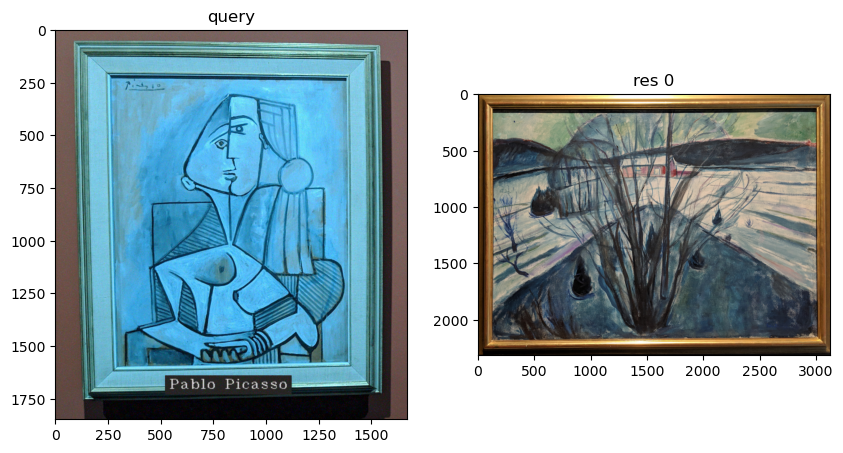

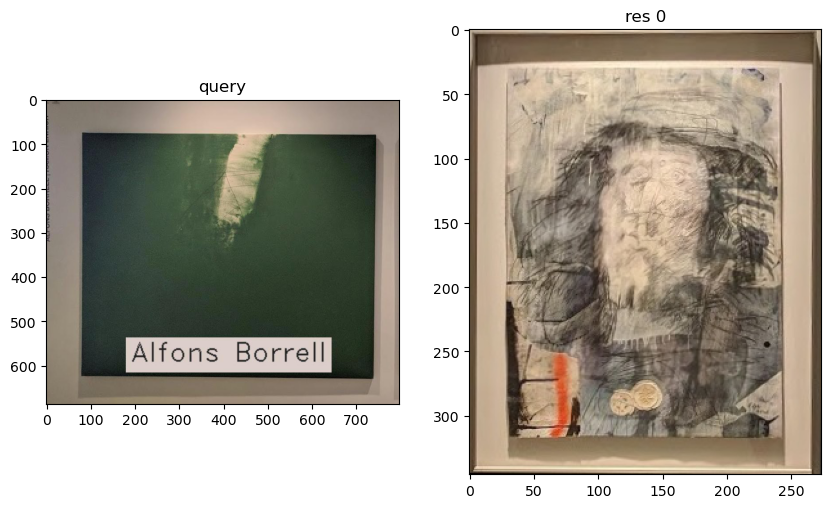

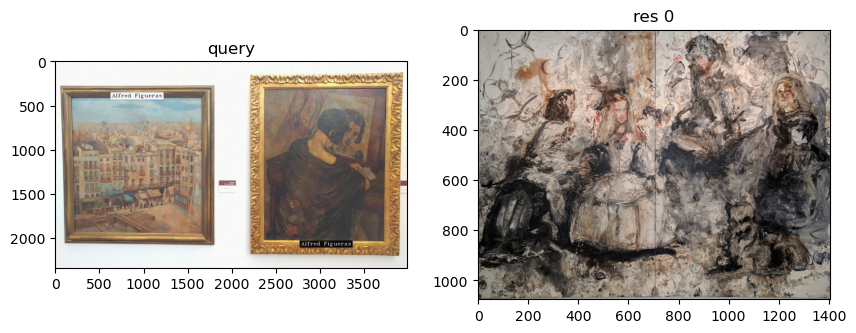

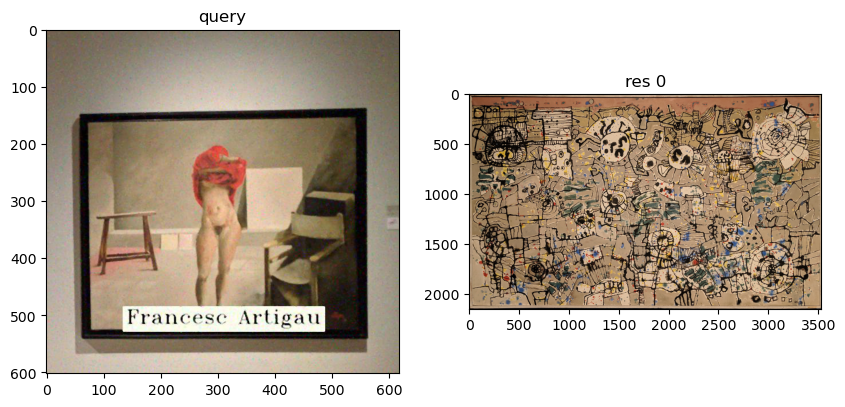

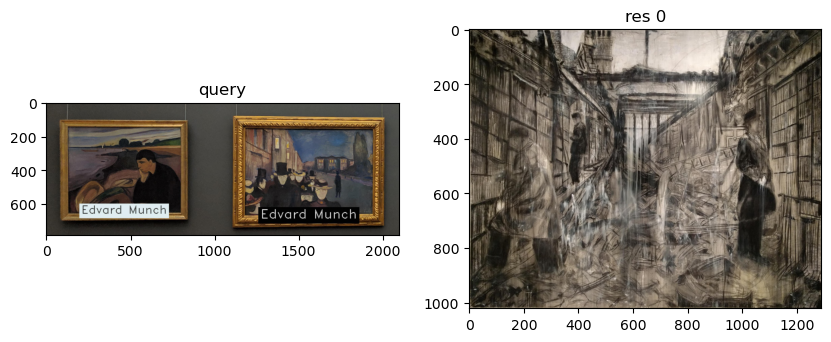

In [33]:
from skimage.io import imread

def plot_image_and_similar_multiple(qs, top_k_qs) -> None:

    for i in range(min(5, len(qs))):
        query = qs[i]

        f, axarr = plt.subplots(1, 1+len(top_k_qs[i]), figsize=(10, 10))
        axarr[0].imshow(query)
        axarr[0].title.set_text("query")
        for j in range(len(top_k_qs[i])):
            res = imread(top_k_qs[i][j][0])
            axarr[1+j].imshow(res)
            axarr[1+j].title.set_text(f"res {j}")
        plt.show()

plot_image_and_similar_multiple(qst2_w3, top_10_multiple)